In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn import neighbors  # for KNN

# Other plotting
import seaborn as sns

# For the last point
from sklearn.metrics import accuracy_score

# Classifiers comparison: decision trees and k-nearest neighbors on the dataset Iris

In the following program we compare the prediction results obtained by decision trees and k-nearest neighbors on the dataset Iris

## Classification with Decision Tree

The following cell shows the program training a decision tree and its results in preciction 

In [2]:
iris = load_iris()

clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=300,
                                  min_samples_leaf=5,
                                  class_weight={0: 1, 1: 1, 2: 1})
clf = clf.fit(iris.data, iris.target)

# score will be the accuracy
# Notes:
# - "cv": int, to specify the number of folds.
# - scores: Array of scores of the estimator for each run of
# the cross validation.
scores = cross_val_score(clf, iris.data, iris.target, cv=5)
print("Accuracy: {0}".format(scores))

Accuracy: [0.96666667 1.         0.86666667 0.86666667 1.        ]


## Classification with KNN

The following cell shows the training of k-nearest neighbors and its prediction results.
Here we use a uniform weighting setting (weights='uniform'): any neighbors weights the same in the majority voting aggregation.

In [3]:
def pretty_print_predictions(clf: neighbors.KNeighborsClassifier):
    # printing the model predictions

    print("Model predictions:\n")
    print("index\tstatus\tprediction")
    for i in range(len(iris.target)):
        # taking the instance at row i, and reshaping it for safety
        instance = (iris.data[i, :]).reshape(1, -1)

        # since the prediction returns an array of index of predicted classes,
        # we take that index with the syntax [0]
        predicted = clf_knn.predict(instance)[0]

        # if the prediction is correct
        if iris.target[i] == predicted:
            print("{0}\tok\t{1}"
                  .format(i, iris.target_names[iris.target[i]]))
        else:
            print("{0}\terror\t\tpredicted class: {1}, real class: {2}"
                  .format(i, iris.target_names[predicted],
                          iris.target_names[iris.target[i]]))

In [4]:
n_neighbors = 11

clf_knn = neighbors.KNeighborsClassifier(n_neighbors, weights='uniform')
clf_knn = clf_knn.fit(iris.data, iris.target)

# score will be the accuracy
scores = cross_val_score(clf_knn, iris.data, iris.target, cv=5)
print("Accuracy: {0}\n".format(scores))

pretty_print_predictions(clf_knn)

Accuracy: [0.93333333 1.         1.         0.96666667 1.        ]

Model predictions:

index	status	prediction
0	ok	setosa
1	ok	setosa
2	ok	setosa
3	ok	setosa
4	ok	setosa
5	ok	setosa
6	ok	setosa
7	ok	setosa
8	ok	setosa
9	ok	setosa
10	ok	setosa
11	ok	setosa
12	ok	setosa
13	ok	setosa
14	ok	setosa
15	ok	setosa
16	ok	setosa
17	ok	setosa
18	ok	setosa
19	ok	setosa
20	ok	setosa
21	ok	setosa
22	ok	setosa
23	ok	setosa
24	ok	setosa
25	ok	setosa
26	ok	setosa
27	ok	setosa
28	ok	setosa
29	ok	setosa
30	ok	setosa
31	ok	setosa
32	ok	setosa
33	ok	setosa
34	ok	setosa
35	ok	setosa
36	ok	setosa
37	ok	setosa
38	ok	setosa
39	ok	setosa
40	ok	setosa
41	ok	setosa
42	ok	setosa
43	ok	setosa
44	ok	setosa
45	ok	setosa
46	ok	setosa
47	ok	setosa
48	ok	setosa
49	ok	setosa
50	ok	versicolor
51	ok	versicolor
52	ok	versicolor
53	ok	versicolor
54	ok	versicolor
55	ok	versicolor
56	ok	versicolor
57	ok	versicolor
58	ok	versicolor
59	ok	versicolor
60	ok	versicolor
61	ok	versicolor
62	ok	versicolor
63	ok	versicolor
64	ok	vers

### Weighted Voting

In the following cell we use a varying weighting setting (**weights='distance'**): any neighbors weights inversely with its distance to the test instance in the majority voting aggregation.

In [5]:
n_neighbors = 11
clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
clf_knn2.fit(iris.data, iris.target)

# COmputing the accuracy
print("Classification score of k-nn with distance weighting")
scores2 = cross_val_score(clf_knn2, iris.data, iris.target, cv=5,scoring='accuracy') # score will be the accuracy
print("Accuracy:\t{0}\nPrevious model:\t{1}\n".format(scores2, scores))

pretty_print_predictions(clf_knn2)

Classification score of k-nn with distance weighting
Accuracy:	[0.96666667 1.         1.         0.96666667 1.        ]
Previous model:	[0.93333333 1.         1.         0.96666667 1.        ]

Model predictions:

index	status	prediction
0	ok	setosa
1	ok	setosa
2	ok	setosa
3	ok	setosa
4	ok	setosa
5	ok	setosa
6	ok	setosa
7	ok	setosa
8	ok	setosa
9	ok	setosa
10	ok	setosa
11	ok	setosa
12	ok	setosa
13	ok	setosa
14	ok	setosa
15	ok	setosa
16	ok	setosa
17	ok	setosa
18	ok	setosa
19	ok	setosa
20	ok	setosa
21	ok	setosa
22	ok	setosa
23	ok	setosa
24	ok	setosa
25	ok	setosa
26	ok	setosa
27	ok	setosa
28	ok	setosa
29	ok	setosa
30	ok	setosa
31	ok	setosa
32	ok	setosa
33	ok	setosa
34	ok	setosa
35	ok	setosa
36	ok	setosa
37	ok	setosa
38	ok	setosa
39	ok	setosa
40	ok	setosa
41	ok	setosa
42	ok	setosa
43	ok	setosa
44	ok	setosa
45	ok	setosa
46	ok	setosa
47	ok	setosa
48	ok	setosa
49	ok	setosa
50	ok	versicolor
51	ok	versicolor
52	ok	versicolor
53	ok	versicolor
54	ok	versicolor
55	ok	versicolor
56	ok	versicolor
57	

### Updating the K parameter

The following cell shows the tuning of the k-nn models with a varying value of k (number of nearest neighbors) and finds the best value of k (giving the maximum accuracy).

In [6]:
# training on the 60% of the dataset (90 instances),
# testing on the 40% (60 instances)
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.4,
                                                    random_state=0)

best_accuracy = 0
best_k = 1

# ndarray for storing accuracies
A = np.zeros(len(y_train), dtype=np.float)

# interating for every neighbor, from 1 to 90 (training set size)
for n_neighbors in np.arange(1, len(y_train) + 1):
    # training a KNN classifier with neighbors = n_neighbors
    clf_knn3 = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
    clf_knn3.fit(X_train, y_train)

    # storing the accuracy on the test set in the A ndarray.
    index = n_neighbors - 1
    A[index] = clf_knn3.score(X_test, y_test)

    # updating the best accuracy and number of neighbors
    if best_accuracy < clf_knn3.score(X_test, y_test):
        best_accuracy = clf_knn3.score(X_test, y_test)
        best_k = n_neighbors

    print("k-neighbors={0}\taccuracy={1}"
          .format(n_neighbors, clf_knn3.score(X_test, y_test)))

k-neighbors=1	accuracy=0.9166666666666666
k-neighbors=2	accuracy=0.9166666666666666
k-neighbors=3	accuracy=0.9333333333333333
k-neighbors=4	accuracy=0.9166666666666666
k-neighbors=5	accuracy=0.95
k-neighbors=6	accuracy=0.9333333333333333
k-neighbors=7	accuracy=0.9666666666666667
k-neighbors=8	accuracy=0.9333333333333333
k-neighbors=9	accuracy=0.9666666666666667
k-neighbors=10	accuracy=0.9666666666666667
k-neighbors=11	accuracy=0.9666666666666667
k-neighbors=12	accuracy=0.9666666666666667
k-neighbors=13	accuracy=0.9666666666666667
k-neighbors=14	accuracy=0.95
k-neighbors=15	accuracy=0.95
k-neighbors=16	accuracy=0.9166666666666666
k-neighbors=17	accuracy=0.9333333333333333
k-neighbors=18	accuracy=0.9166666666666666
k-neighbors=19	accuracy=0.9166666666666666
k-neighbors=20	accuracy=0.9166666666666666
k-neighbors=21	accuracy=0.9166666666666666
k-neighbors=22	accuracy=0.9166666666666666
k-neighbors=23	accuracy=0.9166666666666666
k-neighbors=24	accuracy=0.9
k-neighbors=25	accuracy=0.91666666

Best k = 7
Best accuracy = 0.9666666666666667


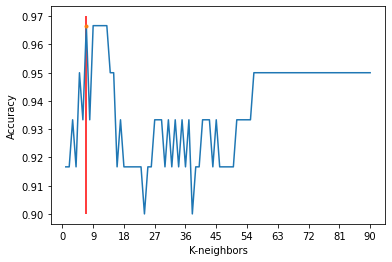

In [7]:
# Printing the best number of k-neighbors and the best accuracy.
print("Best k = {0}".format(best_k))
print("Best accuracy = {0}".format(best_accuracy))

# Plotting the best number of k-neighbors and the best accuracy.
plt.xticks(np.arange(0, len(y_train) + 1, 9))
plt.yticks(np.arange(0.0, 1.0, 0.01))
plt.xlabel('K-neighbors')
plt.ylabel('Accuracy')

# Plotting the red line on the best (k-neighbor,accuracy)
plt.vlines(best_k, 0.90, 0.97, colors='r', linestyles='solid', label='')
plt.plot(np.arange(1, len(y_train) + 1), A)
plt.plot(best_k, best_accuracy, marker=".")

plt.show()

### Uniform VS Distance weighting metrics

In the following cell we plot in the same plot two subplots with the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting: uniform
k-neighbors=1	accuracy=0.9166666666666666
k-neighbors=2	accuracy=0.8833333333333333
k-neighbors=3	accuracy=0.9333333333333333
k-neighbors=4	accuracy=0.9
k-neighbors=5	accuracy=0.95
k-neighbors=6	accuracy=0.9166666666666666
k-neighbors=7	accuracy=0.9666666666666667
k-neighbors=8	accuracy=0.9333333333333333
k-neighbors=9	accuracy=0.9666666666666667
k-neighbors=10	accuracy=0.9666666666666667
k-neighbors=11	accuracy=0.9666666666666667
k-neighbors=12	accuracy=0.95
k-neighbors=13	accuracy=0.95
k-neighbors=14	accuracy=0.9166666666666666
k-neighbors=15	accuracy=0.9333333333333333
k-neighbors=16	accuracy=0.9166666666666666
k-neighbors=17	accuracy=0.9333333333333333
k-neighbors=18	accuracy=0.9333333333333333
k-neighbors=19	accuracy=0.9333333333333333
k-neighbors=20	accuracy=0.9166666666666666
k-neighbors=21	accuracy=0.9333333333333333
k-neighbors=22	accuracy=0.9
k-neighbors=23	accuracy=0.9
k-neighbors=24	accuracy=0.8833333333333333
k-neighbors=25	accuracy=0.8666666666666667
k-

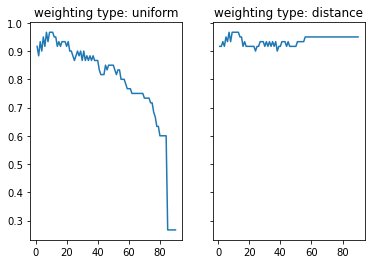

In [8]:
# training on the 60% of the dataset (90 instances),
# testing on the 40% (60 instances)
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.4,
                                                    random_state=0)

i = 0  # parameter in the control of the subplot to draw on'
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True)

for weight_type in ['uniform', 'distance']:
    print("weighting: {0}".format(weight_type))

    # ndarray for storing accuracies
    A = np.zeros(len(y_train), dtype=np.float)
    best_accuracy = 0
    best_k = 1

    # interating for every neighbor, from 1 to 90 (training set size)
    for n_neighbors in np.arange(1, len(y_train) + 1):
        # training a KNN classifier with neighbors = n_neighbors
        # and weights=weight_type
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        clf_knn2.fit(X_train, y_train)

        # storing the accuracy on the test set in the A ndarray.
        index = n_neighbors - 1
        A[index] = clf_knn2.score(X_test, y_test)

        # updating the best accuracy and number of neighbors
        if best_accuracy < clf_knn2.score(X_test, y_test):
            best_accuracy = clf_knn2.score(X_test, y_test)
            best_k = n_neighbors

        print("k-neighbors={0}\taccuracy={1}".format(n_neighbors, clf_knn2.score(X_test, y_test)))

    # Printing the best number of k-neighbors and the best accuracy.
    print("\nBest k = {0}".format(best_k))
    print("Best accuracy = {0}\n".format(best_accuracy))

    # Plotting in the righ subplot
    if i == 0:
        ax1.plot(np.arange(1, len(y_train) + 1),A)
        ax1.set_title('weighting type: {0}'.format(weight_type))
    else:
        ax2.plot(np.arange(1, len(y_train) + 1),A)
        ax2.set_title('weighting type: {0}'.format(weight_type))
    i = i+1

plt.show()


In the following cell we plot (overlapping) in the same picture both the diagrams on accuracy with the two kinds of weighting 
of the vote of the neighbours (uniform and with distance)

weighting: uniform
k-neighbors=1	accuracy=0.9166666666666666
k-neighbors=2	accuracy=0.8833333333333333
k-neighbors=3	accuracy=0.9333333333333333
k-neighbors=4	accuracy=0.9
k-neighbors=5	accuracy=0.95
k-neighbors=6	accuracy=0.9166666666666666
k-neighbors=7	accuracy=0.9666666666666667
k-neighbors=8	accuracy=0.9333333333333333
k-neighbors=9	accuracy=0.9666666666666667
k-neighbors=10	accuracy=0.9666666666666667
k-neighbors=11	accuracy=0.9666666666666667
k-neighbors=12	accuracy=0.95
k-neighbors=13	accuracy=0.95
k-neighbors=14	accuracy=0.9166666666666666
k-neighbors=15	accuracy=0.9333333333333333
k-neighbors=16	accuracy=0.9166666666666666
k-neighbors=17	accuracy=0.9333333333333333
k-neighbors=18	accuracy=0.9333333333333333
k-neighbors=19	accuracy=0.9333333333333333
k-neighbors=20	accuracy=0.9166666666666666
k-neighbors=21	accuracy=0.9333333333333333
k-neighbors=22	accuracy=0.9
k-neighbors=23	accuracy=0.9
k-neighbors=24	accuracy=0.8833333333333333
k-neighbors=25	accuracy=0.8666666666666667
k-

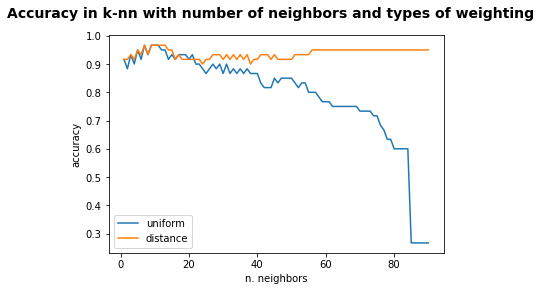

In [9]:
X_train, X_test, y_train, y_test = train_test_split(iris.data,
                                                    iris.target,
                                                    test_size=0.4,
                                                    random_state=0)

fig = plt.figure()
fig.suptitle('Accuracy in k-nn with number of neighbors and types of weighting',
             fontsize=14, fontweight='bold')
ax = fig.add_subplot(111)
ax.set_xlabel('n. neighbors')
ax.set_ylabel('accuracy')

# 2 arrays for storing accuracies for each type of weigthing
A = np.zeros((len(y_train),2), dtype=np.float)
# parameter in the control of the different diagram (=matrix A column index)
i = 0
best_accuracy = 0

for weight_type in ['uniform','distance']:
    print("weighting: {0}".format(weight_type))
    best_accuracy = 0
    best_k = 1

    # interating for every neighbor, from 1 to 90 (training set size)
    for n_neighbors in np.arange(1, len(y_train) + 1):
        # training a KNN classifier with neighbors = n_neighbors
        # and weights=weight_type
        clf_knn2 = neighbors.KNeighborsClassifier(n_neighbors, weights=weight_type)
        clf_knn2.fit(X_train, y_train)

        # storing the accuracy on the test set in the A ndarray.
        index = n_neighbors - 1  # computes the matrix row index
        A[index, i] = clf_knn2.score(X_test, y_test)

        # updating the best accuracy and number of neighbors
        if best_accuracy < clf_knn2.score(X_test, y_test):
            best_accuracy = clf_knn2.score(X_test, y_test)
            best_k = n_neighbors

        print("k-neighbors={0}\taccuracy={1}".format(n_neighbors,
                                                     clf_knn2.score(X_test, y_test)))

    # Printing the best number of k-neighbors and the best accuracy.
    print("\nBest k = {0}".format(best_k))
    print("Best accuracy = {0}\n".format(best_accuracy))

    # Plotting
    plt.plot(np.arange(1, len(y_train) + 1), A[:, i])
    i += 1

plt.legend(['uniform', 'distance'], loc='lower left')
plt.show()


## TODO: your work!

### Step 1

Plot the Iris dataset, in 2-D, with a red color for Setosa, blue for Versicolor and green for Virginica.

Legend: {0: 'setosa', 1: 'versicolor', 2: 'virginica'}


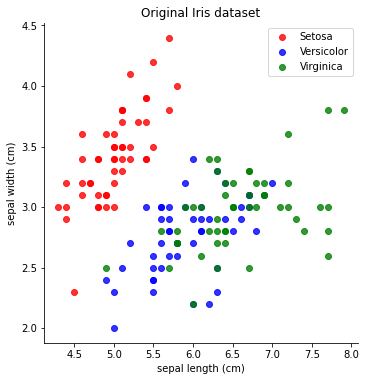

In [10]:
df = load_iris(as_frame=True)

new = df.data.copy()
new["target"] = df.target

sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", data=new, hue="target",
           palette=["red", "blue", "green"], fit_reg=False, legend=False)

legend = {index: value for index, value in enumerate(df.target_names)}
print(f"Legend: {legend}")
plt.legend(labels=['Setosa', 'Versicolor', 'Virginica'])
plt.title("Original Iris dataset")
plt.show()

### Step 2

Plot the Iris dataset, in 2-D, with the color as above determined by the k-nn estimation

In [11]:
predicted_y = clf_knn.predict(iris.data)

new["prediction1"] = predicted_y
different_rows = new[new['target'] != new['prediction1']]
print(f"Different rows: {len(different_rows)}\n\n{different_rows}\n")

Different rows: 4

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
77                 6.7               3.0                5.0               1.7   
83                 6.0               2.7                5.1               1.6   
106                4.9               2.5                4.5               1.7   
138                6.0               3.0                4.8               1.8   

     target  prediction1  
77        1            2  
83        1            2  
106       2            1  
138       2            1  



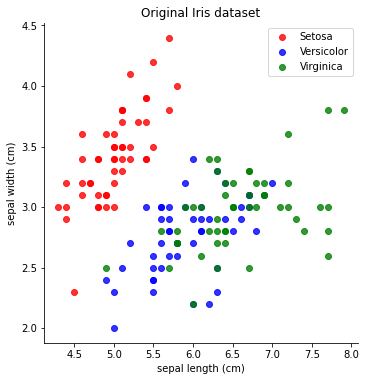

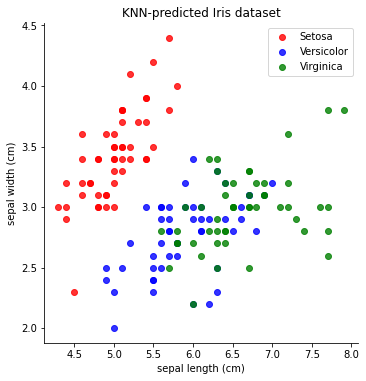

In [12]:
sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", data=new, hue="target", palette=["red", "blue", "green"], fit_reg=False, legend=False)
plt.title("Original Iris dataset")
plt.legend(labels=['Setosa', 'Versicolor', 'Virginica'])

sns.lmplot(x="sepal length (cm)", y="sepal width (cm)", data=new, hue="prediction1", palette=["red", "blue", "green"], fit_reg=False, legend=False)
plt.title("KNN-predicted Iris dataset")
plt.legend(labels=['Setosa', 'Versicolor', 'Virginica'])

plt.show()

### Step 3

In the following, extend the above exercize on KNN using a kernel function $K(x,y)$ for the distances computation, such that 

$distance(x,y)=1-K(x,y)$

Use a Gaussian-like or Radial Basis Function kernel. Here is the definition of Gaussian kernel (**note: weird, it's the same as Radial Basis function kernel from wikipedia...**).

$K(x,y)=exp(- \frac{||(x-y)||^2}{2\sigma^2})$

An equivalent definition involves a parameter $\gamma = \frac{1}{2\sigma^2}$:

$K(x,y)=exp(- \gamma||x-x'||^2)$

With $\gamma$ the inverse of the $\sigma^2$ variance, that must be tuned to the best value according to the accuracy reached by the KNN, with k=7 (similarly as done with the previous example on tuning the parameter n_neightbors).

In [13]:
def radial_basis_function_kernel(sigma):
    '''
    Implementation of Radial Basis Kernel Function. 
    For further details visit: https://en.wikipedia.org/wiki/Radial_basis_function_kernel
    '''

    # Note: "distance" is the squared Euclidean distance between two vectors.
    return lambda distance: np.exp(- (distance / (2*(sigma**2))))


best_sigma = 0
best_accuracy = 0

# Iterate n_times times. Each time we check if the accuracy improves. 
# If it improves, we update both the "best_accuracy" and "best_sigma" parameters.
# In the end we should get the maximum best accuracy.

start = 0.01  # the first element of the interval
stop = 10  # the last element of the interval
n_times = 100

for sigma in np.linspace(start=start, stop=stop, num=n_times):
    clf = neighbors.KNeighborsClassifier(n_neighbors = 7, weights=radial_basis_function_kernel(sigma))
    clf.fit(X_train, y_train)
    y_predicted = clf.predict(X_test)

    if best_accuracy < accuracy_score(y_predicted, y_test):
        best_accuracy = accuracy_score(y_predicted, y_test)
        best_sigma = sigma

print("Best Sigma = {}".format(best_sigma))
print("Best Accuracy = {}".format(best_accuracy))

# Final test with maximized sigma, it should return the best accuracy
clf_g = neighbors.KNeighborsClassifier(n_neighbors=7,
                                       weights=radial_basis_function_kernel(best_sigma))
clf_g.fit(iris.data, iris.target)
y_predicted = clf.predict(X_test)

acc = accuracy_score(y_predicted, y_test)
print("\nFinal Accuracy = {}".format(acc))

Best Sigma = 0.6154545454545455
Best Accuracy = 0.9666666666666667

Final Accuracy = 0.9666666666666667
